In [250]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams


In [251]:
import os
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files
from scipy.sparse import csr_matrix


Задание 1
Загрузите файл HR.csv в pandas dataframe

In [252]:
df_hr = pd.read_csv('/Users/macbookpro/Desktop/Netology/пред. Диплом/HR.csv')
df_hr.columns = df_hr.columns.str.lower()
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [253]:
df_hr.isna().sum()
#Пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [254]:
df_hr_numerical = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years']]
df_hr_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [255]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [256]:
df_hr_numerical.describe()
#Среднее, мин и макс значения 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [257]:
df_hr_numerical.mode()
# Мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


In [258]:
# Мода
for x in df_hr_numerical:
    Moda = df_hr_numerical[x].mode()
    print(x, f' Мода:, {Moda[0]}')
    

satisfaction_level  Мода:, 0.1
last_evaluation  Мода:, 0.55
number_project  Мода:, 4
average_montly_hours  Мода:, 135
time_spend_company  Мода:, 3
work_accident  Мода:, 0
left  Мода:, 0
promotion_last_5years  Мода:, 0


In [259]:
df_hr_numerical.std(ddof=1) 
#Cреднее отклонение

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [260]:
df_hr_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


Задание 3. 

Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

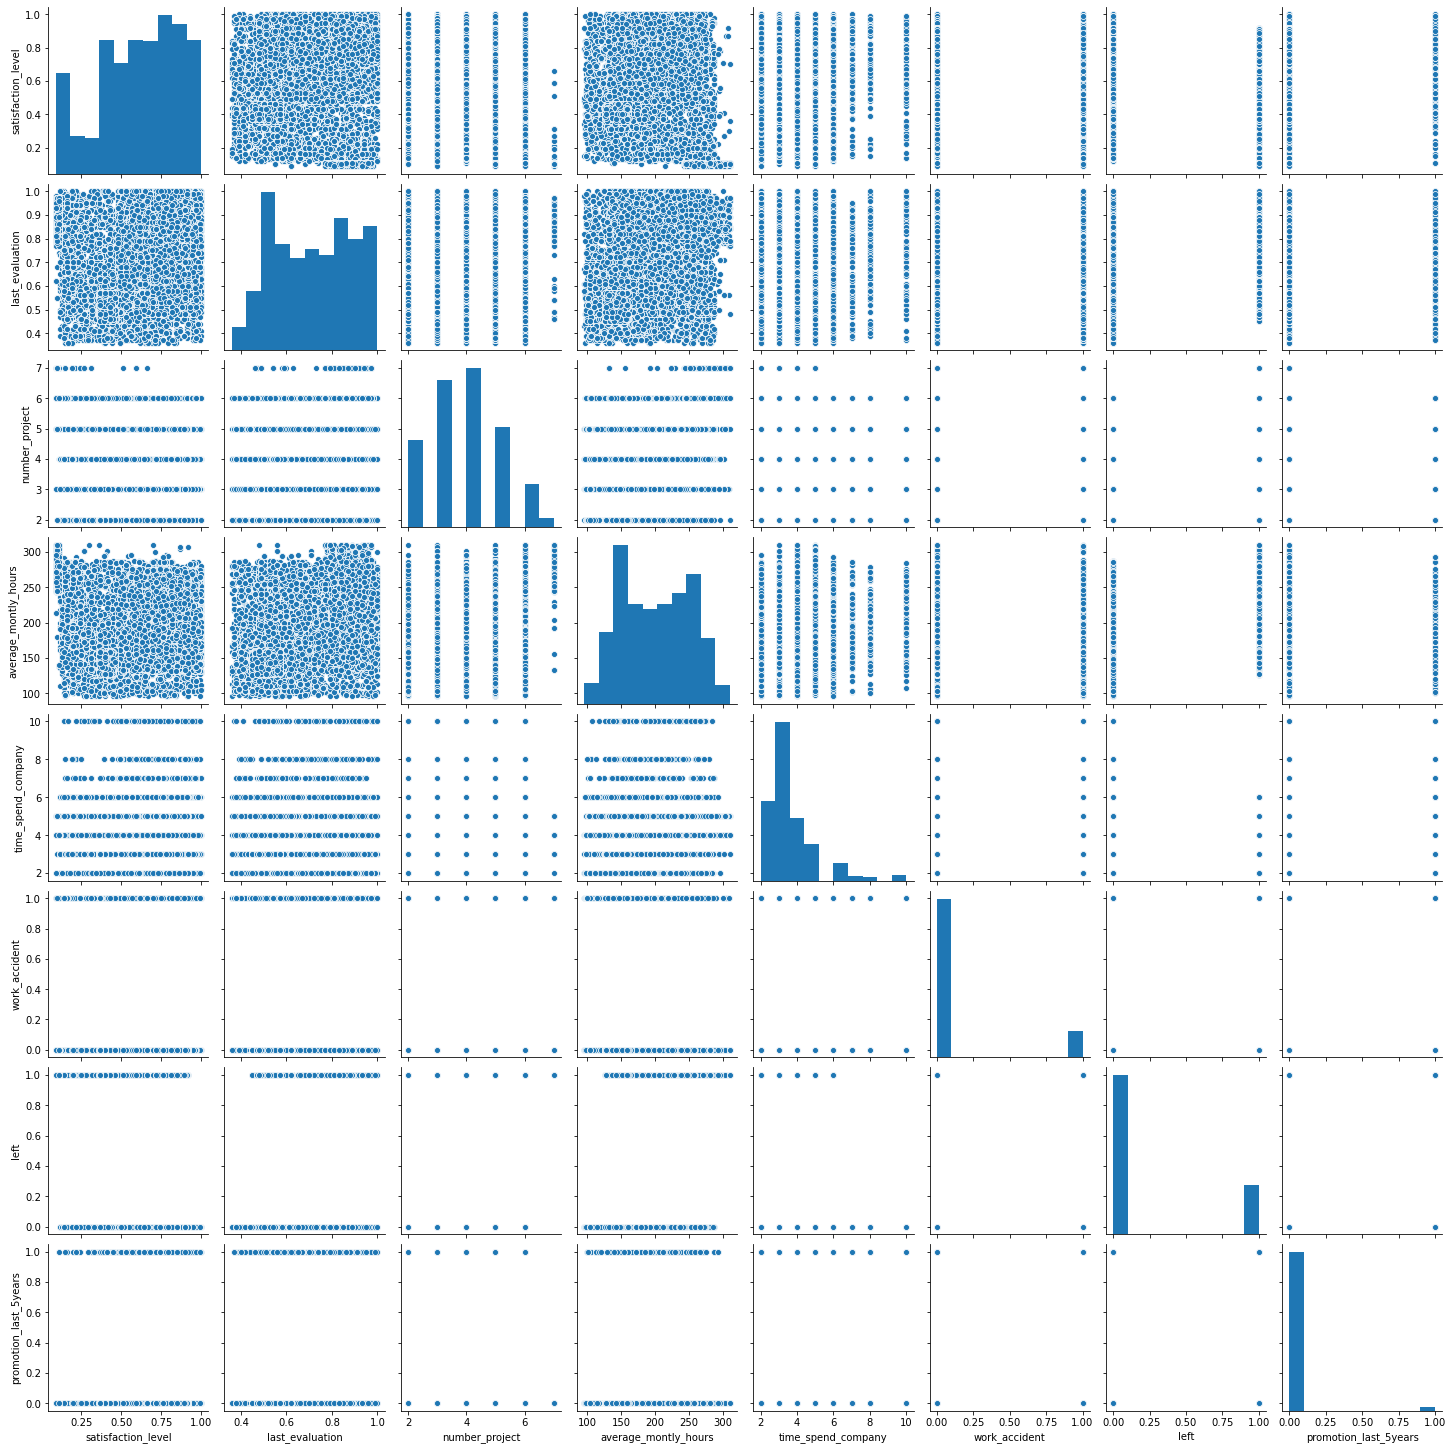

In [261]:
sns.pairplot(df_hr_numerical)


In [262]:
df_hr_numerical.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [263]:
df_hr_numerical.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [264]:
#Менее коррелированные переменные это:
df_hr_numerical[['number_project', 'work_accident']].corr(method='spearman')

,number_project,work_accident
number_project,1.000000,0.002328
work_accident,0.002328,1.000000


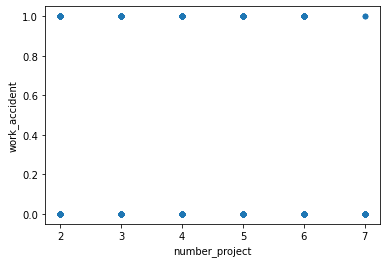

In [265]:
df_hr_numerical.plot(kind='scatter', 
        x='number_project', 
        y='work_accident'
       )

In [266]:
#Более коррелированные переменные это:
df_hr_numerical[['average_montly_hours', 'number_project']].corr(method='spearman')

,average_montly_hours,number_project
average_montly_hours,1.000000,0.397855
number_project,0.397855,1.000000


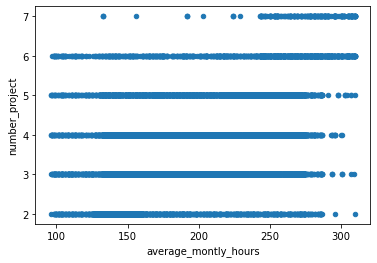

In [267]:
df_hr_numerical.plot(kind='scatter', 
        x='average_montly_hours', 
        y='number_project'
       )

Задание 4.

Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [268]:
from collections import Counter

In [269]:
Counter(df_hr['department'])

Counter({'sales': 4140,
         'accounting': 767,
         'hr': 739,
         'technical': 2720,
         'support': 2229,
         'management': 630,
         'IT': 1227,
         'product_mng': 902,
         'marketing': 858,
         'RandD': 787})

In [270]:
df_hr.groupby(['department']).size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [271]:
df_hr['department'].value_counts().sort_values(ascending = False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Задание 5

Показать распределение сотрудников по зарплатам

In [272]:
df_hr.groupby(['department', 'salary'])[['satisfaction_level']].count()


satisfaction_level
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

Задание 6*

Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [273]:
df_hr.pivot_table(index = 'department', columns = 'salary', aggfunc = 'count', fill_value = 0, 
                    margins = True).head()

average_montly_hours                   last_evaluation              \
salary                     high  low medium   All            high  low medium   
department                                                                      
IT                           83  609    535  1227              83  609    535   
RandD                        51  364    372   787              51  364    372   
accounting                   74  358    335   767              74  358    335   
hr                           45  335    359   739              45  335    359   
management                  225  180    225   630             225  180    225   

                 left       ... satisfaction_level       time_spend_company  \
salary       All high  low  ...             medium   All               high   
department                  ...                                               
IT          1227   83  609  ...                535  1227                 83   
RandD        787   51  364  ...                372   787                 51   
accounting   767   74  358  ...                335   767                 74   
hr           739   45  335  ...                359   739                 45   
management   630  225  180  ...                225   630                225   

                             work_accident                    
salary      low medium   All          high  low medium   All  
department                                                    
IT          609    535  1227            83  609    535  1227  
RandD       364    372   787            51  364    372   787  
accounting  358    335   767            74  358    335   767  
hr          335    359   739            45  335    359   739  
management  180    225   630           225  180    225   630  

[5 rows x 32 columns]

In [274]:
df_hr_salary = df_hr[['salary', 'department']]


In [275]:
df_hr_salary[df_hr_salary.salary == 'high'].groupby(['department']).count()


,salary
department,
IT,83
RandD,51
accounting,74
hr,45
management,225
marketing,80
product_mng,68
sales,269
support,141


In [276]:
df_hr_salary[df_hr_salary.salary == 'low'].groupby(['department']).count()


,salary
department,
IT,609
RandD,364
accounting,358
hr,335
management,180
marketing,402
product_mng,451
sales,2099
support,1146


In [277]:
df_hr_salary[df_hr_salary.salary == 'medium'].groupby(['department']).count()

,salary
department,
IT,535
RandD,372
accounting,335
hr,359
management,225
marketing,376
product_mng,383
sales,1772
support,942


Задание 7*

Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

In [278]:
df_time = df_hr[['average_montly_hours', 'salary']]
df_time.head()

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low


In [279]:
df_low = df_time.groupby(df_time['salary'] == 'low')['average_montly_hours'].sum()
x = np.array(df_low)
x

array([1545063, 1470491])

In [280]:
df_high = df_time.groupby(df_time['salary'] == 'high')['average_montly_hours'].sum()
y = np.array(df_high)
y

array([2768318,  247236])

In [284]:
alpha = 0.05
t, p = stats.ttest_ind(x, y)



t, p

NameError: name 'stats' is not defined

In [285]:
result = stats.df_high_ind(a=x, b=y, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

NameError: name 'stats' is not defined

In [49]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [53]:
employees = df_hr['left'].count()
print(f' Количество сотрудников {employees}')

df_left = df_hr.groupby(df_hr['left'] == 1)['promotion_last_5years'].sum()
print(f' Сотрудников уволились после повышения : {df_left[1]}')

l = df_left[1]/employees*100
print(f' Доля сотрудников уволившихся после повышения: {l.round(1)}%')

df_not_left = df_hr.groupby(df_hr['left'] == 0)['promotion_last_5years'].sum()
print(f' Сотрудников остались работать после повышения : {df_not_left[1]}')

d = df_not_left[1]/employees*100
print(f' Доля сотрудников не уволившихся после повышения: {d.round(1)}%')


 Количество сотрудников 14999
 Сотрудников уволились после повышения : 19
 Доля сотрудников уволившихся после повышения: 0.1%
 Сотрудников остались работать после повышения : 300
 Доля сотрудников не уволившихся после повышения: 2.0%


In [52]:
df_maen_left = df_hr.groupby(df_hr['left'] == 1)['satisfaction_level'].mean()
df_maen_left
print(f' Средняя оценка удовлетворения у уволившихся : {df_maen_left[1]}')

df_maen_not_left = df_hr.groupby(df_hr['left'] == 0)['satisfaction_level'].mean()
df_maen_not_left
print(f' Средняя оценка удовлетворения у  не уволившихся : {df_maen_not_left[1]}')

 Средняя оценка удовлетворения у уволившихся : 0.44009801176140917
 Средняя оценка удовлетворения у  не уволившихся : 0.666809590479516


In [36]:
df_project_left = df_hr.groupby(df_hr['left'] == 1)['number_project'].mean()
df_project_left
print(f' Средняя количество проектов у уволившигося сотрудника : {df_project_left[1]}')

df_project_not_left = df_hr.groupby(df_hr['left'] == 0)['number_project'].mean()
#df_project_not_left
print(f' Средняя количество проектов у не уволившигося сотрудника : {df_project_not_left[1]}')

 Средняя количество проектов у уволившигося сотрудника : 3.8555026603192384
 Средняя количество проектов у не уволившигося сотрудника : 3.786664333216661


Задание 9*

Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки

In [239]:
df_hr_numerical = df_hr.drop('left', axis=1)
df_hr_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [240]:
df_target = df_hr['left']
df_target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [241]:
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(df_target)
y

array([1, 1, 1, ..., 1, 1, 1])

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_hr_numerical, y, test_size=0.25)

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
lr = LogisticRegression()

In [249]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'low'

In [246]:
lr.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [247]:
y_pred = lr.predict(X_test)
y_pred

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [248]:
accuracy_score(y_test, y_pred)

0.7042666666666667